<a href="https://colab.research.google.com/github/abolfazlahmadi/AI_teaching/blob/main/GH1024356_FinalProject_M505A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assessment Submission Form
|||
| :--------------------------   | :-------------------------------------------------: |
|**Student Number** | **GH1024356** |
|**Module Code**| **M505A Intro to AI and Machine Learning (WS0124)** |
|**Module Title**| **Intro to AI and Machine Learning** |
|**Module Tutor**| **Prof. Dr. Mohammad Mahdavi** |
|**Date Submitted**| **2024-04-11** |


***By submitting my assignment, I automatically sign the Assessed Submission Form and take responsibility for my submission.***

Declaration of Authorship

 I declare that all material in this assessment is my own work except where there is clear acknowledgement and appropriate reference to the work of others.

I fully understand that the unacknowledged inclusion of another person’s writings or ideas or works in this work may be considered plagiarism and that, should a formal investigation process confirms the allegation, I would be subject to the penalties associated with plagiarism, as per GISMA Business School, University of Applied Sciences’ regulations for academic misconduct.

***Abolfazl Ahmadi***

***2024-04-11***




# Introduction
Due to the cost of curement, Cardiovascular diseases pose a significant global health challenge for insurance companies. Our insurance company, Dr-Walter, decided to have various pricing for their customers. This pricing is related to risks of different diseases. Cardiovascular diseases is one of the most impactful diseases on pricing. Therefore, there is an option for customers to do a check-up and if there is no sign of Cardiovascular diseases, they will get an offer for a discounted plan.
## Problem Statement
The problem is to predict if the customer has Cardiovascular diseases or not. To achieve this goal, I have to train a classification model based on previous customers with their result of medical examination and their information. There are two target classes as 0-negetive or 1-positive cardio-diseases.
False-positive prediction is not an issue, due to the fact that altough it is not fair, this only causes the customer to pay more. On the other hand, a high rate of false-negetive might lead to a huge expense for the insrance company. The accuracy of the model would make customer satisfaction with discounted plans the make profitable deals.

## Dataset

(Svetlana Ulianova, 2023) The "Cardiovascular Disease dataset" consists of 70 000 records of patients data, 11 features + target. There are 3 types of input features:

Objective: factual information;

Examination: results of medical examination;

Subjective: information given by the patient.

**Features:**

1.   Age | Objective Feature | age | int (days)
2.   Height | Objective Feature | height | int (cm) |
3.   Weight | Objective Feature | weight | float (kg) |
4.   Gender | Objective Feature | gender | categorical code |
5.   Systolic blood pressure | Examination Feature | ap_hi | int |
6.   Diastolic blood pressure | Examination Feature | ap_lo | int |
7.   Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.   Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.   Smoking | Subjective Feature | smoke | binary |
10.   Alcohol intake | Subjective Feature | alco | binary |
11.   Physical activity | Subjective Feature | active | binary |
12.   Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

The dataset could be accessed through the original link(has some comma-delimited issue) of kaggle website or edited one in my own shared folder in google drive from below links:

*   [Dataset in my google drive - without csv format issues](https://drive.google.com/file/d/1dO-wLsb_AwNBQleEmWxN6O76MVliD6vh/view?usp=sharing)
*   [Dataset in kaggle website - has some csv format issues](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)





# Import libraries and dataset


In [42]:
# import packages

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
import sklearn


import matplotlib.pyplot as plt


# Data Collection
Data has been downloaded from kaggle website and I improve the csv file format issue and shared the corrected file in my google drive. Then it is uploaded to a dataframe via pandas library functions. The dataset then splited into two dataset train and test.

In [43]:
# read the csv file - import dateset to a pandas list
df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/M505A/cardio_train.csv")
#show the first row of our original dataset
df.head(1)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
log_transformer = FunctionTransformer(np.log1p, validate=True)
df['log_age'] = log_transformer.fit_transform(df[['age']])
df.drop('age', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
#remove implicit data missing
df = df[df['weight'] > 20]
df = df[df['ap_hi'] > 0]
df = df[df['ap_hi'] < 300]
df = df[df['ap_lo'] > 0]
df = df[df['ap_lo'] < 500]

df_train,df_test = train_test_split(df)

print("df size:",df.shape)
print("df_train size:",df_train.shape)
print("df_test size:",df_test.shape)


df size: (68984, 12)
df_train size: (51738, 12)
df_test size: (17246, 12)


## Data Exploration

For data exploration, we need to go through the dataset and understanding the data by keeping an eye on data types of features,histogram of numerical data, null values, duplicated rows, unique values, categorical features and transformation and features which need to be normalized. Also, check for explicit missing values like null or implicit missing values like wrong values or wrong range of values.






In [44]:
#show the first row of our original dataset
df.head(1)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,log_age
0,2,168,62.0,110,80,1,1,0,0,1,0,9.81978


In [45]:
# check type of each column
df.dtypes

gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
log_age        float64
dtype: object

<Axes: >

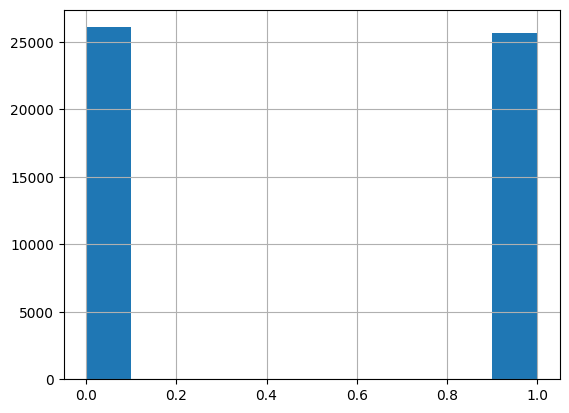

In [46]:
# checking statistics and summary of the dataset
#distribution of target labels. check if train data is balanced
df_train["cardio"].hist()


In [47]:
df_train["cardio"].unique()


array([0, 1])

In [48]:
# check implicit missing values
df_train["gender"].unique()


array([1, 2])

In [49]:
# check missing data
df_train.isnull().count()

gender         51738
height         51738
weight         51738
ap_hi          51738
ap_lo          51738
cholesterol    51738
gluc           51738
smoke          51738
alco           51738
active         51738
cardio         51738
log_age        51738
dtype: int64

In [50]:
# get to know about unique values of each column
df_train.nunique()

gender            2
height          102
weight          255
ap_hi           113
ap_lo            92
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
log_age        7856
dtype: int64

gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
log_age        False
dtype: bool

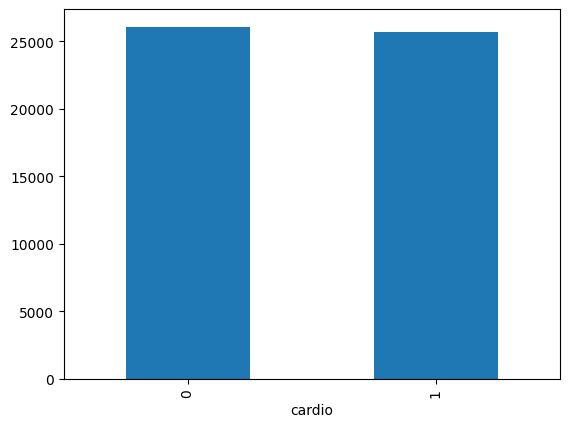

In [51]:
#number of nulls
df_train.isnull().sum()
#distribution of target label
df_train["cardio"].value_counts().plot(kind="bar")
#see if a column is filled with 0
df_train.sum() == 0


## Data Preprocessing
The first step of data preprocessing is to drop the unwanted attributes,duplicated rows to prevent data leakage, fill missing values, transform categorical features, normalized numerical features, etc.
I had seperated the train and test datasets before. Now, it is the time to seperate the target label and other features.



In [52]:
# drop null and duplicated values
df_train = df_train.dropna()
df_train = df_train.drop_duplicates()
df_train["cardio"].value_counts().sum()
# the results did not change, so there were null or duplicated values

51728

In [53]:
#seperate features from target labels
y_train=df_train["cardio"]
y_test=df_test["cardio"]
x_train= df_train.drop(["cardio"] , axis=1)
x_test=df_test.drop(["cardio"] , axis=1)

print("x_train size:",x_train.shape)
print("y_train size:",y_train.shape)
print("x_ttest size:",x_test.shape)
print("y_test size:",y_test.shape)



x_train size: (51728, 11)
y_train size: (51728,)
x_ttest size: (17246, 11)
y_test size: (17246,)


# Feature Engineering
In Feature Engineering part, I select numerical columns and categorical columns. I tried to normalized numerical columns and encode categorical ones. Although "gender" column is numerical, it is not a ordinal category so I had to encode it using one-hot-encoder. Since it was numerical, I added the column mannually to the categorical list.

After a deep exploratory I realized that my result might be affected by my feature units specially AGE feature which was in days. I decided to change the unit by applying another transformation: Logarithmic Transformation.

For dimensional reduction I use PCA algorithm. I applied all transformations on both train and test datasets.

In [54]:

# select categorical and non-categorical features
#categorical_columns=x_train.select_dtypes(include=["object"]).columns.tolist()
#categorical_columns is null but since gender is coded to 1 and 2, it is better to assume as categorical and transform via one-hot-encoding algorithm
categorical_columns = list()
#categorical_columns.append("gender")
numerical_columns=x_train.select_dtypes(exclude=["object"]).columns.tolist()

ct = sklearn.compose.ColumnTransformer([
    ("standard_scaling", sklearn.preprocessing.StandardScaler(), numerical_columns),
    ("one_hot_encoding", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_columns),
], remainder="passthrough")


ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print("x_train size:",x_train.shape)
print("y_train size:",y_train.shape)
print("x_ttest size:",x_test.shape)
print("y_test size:",y_test.shape)


x_train size: (51728, 11)
y_train size: (51728,)
x_ttest size: (17246, 11)
y_test size: (17246,)


In [55]:
# our dataset does not have a lot features so I disable this part
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)




# Model training
Since my data is consist of mostly continues numerical feature like weight, age, and some categories like gender. Since I have dataset shape(70000,13) tabular data which is mostly clean and numerical, I assume Gradiant Boosting will work on my data although it is very slow. Also, another ensemble learning, Random Forest which is based on bagging could have faster training with the same result so I will try it. I prefered to use these Four models for classification:


1.   Ensemble learning(Gradient Boosting)
2.   Random Forests
3.   Support Vector Machines (SVM)
4.   logistic regression

Since Gradiant Boosting was too slow for hyperparameter tuning, I decided to use randomizedsearchcv instead of gridsearchcv.
For each model I prepared hyperparameter tuning.

I applied cross-validation technique via using cv parameter in gridsearchcv. I applied n_jobs = -1 to use the maximum parallel cpu I have.

After I found the best model and best parameter for my dataset, I am ready to use the model and assess the result. For choosing the model, there is no consideration of learning time, but testing time should be almost real-time. I mentioned before that False-Positive do not matter a lot for our business, despite the False-Negetive.


In [56]:
# Tune hyperparameter for GradiantBoosting
parameter_grid = {
'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [1, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model_1 = sklearn.model_selection.RandomizedSearchCV(GradientBoostingClassifier(), parameter_grid,  n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1 )
model_1.fit(x_train, y_train)

print("accuray of best   = {: .2f}".format(model_1.best_score_))
print("best hyperparameters for gradiantboostingclassifier (model_1) = {}".format(model_1.best_params_))


accuray of best   =  0.73
best hyperparameters for gradiantboostingclassifier (model_1) = {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}


In [57]:
# Tune hyperparameter for Random Forest
parameter_grid = {
    'n_estimators': [100],  ## since the running was too slow, after a few run, I removed parameters with lower chances from grid
    'max_depth': [ 5,10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1,  4]
}

model_2 = sklearn.model_selection.GridSearchCV(RandomForestClassifier(), parameter_grid, scoring = "accuracy" , cv=5 , n_jobs = -1)
model_2.fit(x_train, y_train)

print("accuray of best (model_2) Random Forest classifier = {: .2f}".format(model_2.best_score_))
print("best hyperparameters for Random Forest Classifier(model_2) = {}".format(model_2.best_params_))


accuray of best (model_2) Random Forest classifier =  0.73
best hyperparameters for Random Forest Classifier(model_2) = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:

# tune hyperparameter for SVM model
parameter_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

model_3 = sklearn.model_selection.RandomizedSearchCV(sklearn.svm.SVC(), parameter_grid,n_iter=5, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
model_3.fit(x_train, y_train)

print("accuray of best (model_3) SVM classifier = {: .2f}".format(model_3.best_score_))
print("best hyperparameters for SVM(model_3) classifier = {}".format(model_3.best_params_))

In [ ]:

# tune hyperparameter for logistic regression model
parameter_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['none', 'l2']
}


model_4 = sklearn.model_selection.GridSearchCV(sklearn.linear_model.LogisticRegression(), parameter_grid, cv=5, scoring='accuracy',  n_jobs=-1)
model_4.fit(x_train, y_train)

print("accuray of best (model_4) LogisticRegression classifier = {: .2f}".format(model_4.best_score_))
print("best hyperparameters for LogisticRegression(model_4) classifier = {}".format(model_4.best_params_))

In [ ]:

# try naive bayes
model_5 = GaussianNB()
model_5.fit(x_train, y_train)
y_p = model_5.predict(x_test)
print("accuray of best (model_5) GaussianNB classifier = {: .2f}".format(accuracy_score(y_test,y_p)))

# Model Assessment

For Assessment, I have to consider that False-Negetive is the most important metrics that affect the business the most.

In [ ]:
# apply the best model with its best hyperpararmeters on our dataset
y_predicted = model_1.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
precision , recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predicted)
cr = sklearn.metrics.classification_report(y_test, y_predicted)
tn, fp, fn, tp = cm.ravel()
tnr = tn / (tn + fp)
fpr = fp / (tn + fp)
print("False Positive Rate:", fpr)
print("True Negative Rate (Specificity):", tnr)
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1-score : ", f1)
print("confusion matrix : \n ", cm)
print("classification report : \n ", cr)



# Final Discussion

As I mentioned before, Gradiant Boosting sounds to be the best fit for my dataset characteristics. I tried to use 4 different classifiers and tune hyperparameters for each which was available. Although due to the resource limitation I could not run hyperparameter tunning deeply and find better parameters for my model, finding accuracy of 74% was good enough since the True-Negetive rate which was the most important rate is 78%. If we need better True-Negetive rate(detect high-risk customers) the fifth model(naive bayes) which was simpler than others and has accuracy of 60%, has a very good 92% True-negetive but 45 percent of quallified customers for discounts will be disappointed.
Training speed and interpretability of decision were not important in this problem so using Gradiant Boosting could help us during this problem.



# References

1.  Svetlana Ulianova (2023) Cardiovascular Disease dataset. Available at: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset (Accessed 15 March 2024).




\



In [ ]:
# !pip install nbconvert

#!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/M505A/GH1024356_FinalProject_M505A.ipynb
